### Current covered scope:
#### Classification Decision Tree only
#### Only numeric features
#### Binary classification (gini works only for binary classification)
#### No Prunning
#### Support random split at each node (mean random feature selection and random split value) - this setting is useful enough for the use case of ensemble of large number of trees.
#### Support best split (greedy) at each node (best features and split value selection)
#### At each node choose from all features (random/best). Later can add option for selecting best feat from a smaller random set of feats

In [1]:
import random
import pandas as pd
import numpy as np

In [2]:
class tNode: 
    left_sub_Node = None
    right_sub_Node = None
    sub_Node = None #single path
    parent_Node = None
    split_value = None
    feature_name = ""
    score = 0.0
    is_leaf = 0
    count_positive = 0
    count_negative =0
    ratio_positive =0
    ratio_negative =0

In [130]:
class tTree:
    #import necessary classes 
    #rd = __import__('random')
    #public variables
    rootNode = tNode()
    splitting_criterion = None
    splitter = None
    max_depth = None
    min_samples_split = None
    node_count = 0
    #end public variables
    
    #private variables
    tree_represent=''
    #end private variables
    
    #private helper functions 
    
    def _cal_gini(self, X, Y, feature, split_value):
        """
        Calculate gini value for the dataset if it is splitted by a specific feature at certain splitting point
        """
        X_left = X.loc[X[feature]<=split_value]
        Y_left = Y.loc[X[feature]<=split_value]
        X_right = X.loc[X[feature]>split_value]
        Y_right = Y.loc[X[feature]>split_value] 
    
        count_left = len(X_left)
        count_right = len(X_right)
        count_left_positive = len(Y_left[Y_left.iloc[:,0]==1])
        count_right_positive = len(Y_right[Y_right.iloc[:,0]==1])
    
        w_l = count_left/(count_left+count_right)
        w_r = 1-w_l
        p_l = count_left_positive/count_left
        p_r = count_right_positive/count_right
    
        gini_value = w_l*(p_l*p_l + (1-p_l)*(1-p_l)) + w_r*(p_r*p_r + (1-p_r)*(1-p_r))
        return gini_value 
    
    def _cal_entropy(self, X, Y, feature, splitting_value):
        """
        Calculate entropy value for the dataset if it is splitted by a specific feature at certain splitting point
        """
        entropy_value=None
        return 1-entropy_value
    
    def _cal_chisqr(self, X, Y, feature, splitting_value):
        """
        Calculate chi-square value for the dataset if it is splitted by a specific feature at certain splitting point
        """
        chisquare_value=None
        return chisquare_value 
    
    def _get_score(self, X, Y, feature, split_value):
        """
        Return the quality score of the split
        """
        if self.splitting_criterion == "gini":
            score = self._cal_gini(X, Y, feature, split_value)
        elif self.splitting_criterion == "entropy":
            score = self._cal_entropy(X, Y, feature, split_value)
        elif self.splitting_criterion == "chisquare":
            score = self._cal_chisqr(X, Y, feature, split_value)
        return score
    
    def _select_best_split(self, X, Y, feature):
        """
        Calculate the best splitting value for a feature 
        """
        #best_score = -1
        #choosed_split_value = None
        #discretize the value range to small bins
        #number_of_bin = 100 #reconsider
        #find the best split
        #bins = None
        #for spli t_value in bins:
        #    score = self._get_score(X, Y, feature, split_value)
        #   if score>best_score:
        #       best_score = score
        #       choosed_split_value = split_value
        return 1 #best_score, choosed_split_value
    
    def _select_best_feature_and_best_split(self, X, Y):  
        """
        Calculate the best feature and splitting value for a dataset
        """
        best_score = -1
        choosed_feature = None
        choosed_split_value = None
        for feature in X.columns:
            score, split_value = self._select_best_split(X,Y,feature)
            if score>best_score:
                best_score = score
                choosed_feature = feature
                choosed_split_value = split_value
        return best_score, choosed_feature, choosed_split_value
                
    def _select_random_split(self, X, Y, feature):
        """
        Get a random splitting value for a feature
        """
        #We can use the mean value
        choosed_split_value = X[feature].mean()
        score = self._get_score(X, Y, feature, choosed_split_value)
        return score, choosed_split_value
        
    def _select_random_feature_and_random_split(self, X, Y):
        """
        Get a random feature and splitting value for a dataset
        """
        #Enhancement: WE MIGHT NEED TO CHECK WHICH FEATUTE IS STILL AVAILABLE TO CHOOSE - WHEN IT IS NOT A GOOD 
        #choice to revisit a feature that already can not progress further
        feat_id = random.randint(0, len(X.columns)-1)
        choosed_feature = X.columns[feat_id]
        score, choosed_split_value =  self._select_random_split(X, Y, choosed_feature)
        return score, choosed_feature, choosed_split_value
        
    def _creat_node(self, X, Y,isleaf):
        """
        A recursive function to build the decision tree
        
        Arguments:
        X -- input data, dataframe of shape (number of examples, number of features)
        Y -- true "label" dataframe of shape (number of examples, 1)

        Outputs: a Node with detailed info: feature_name, split_value (now we handle only numerical data first), left and
        right subnodes
        
        """
        
        splitNode = tNode()
        splitNode.count_positive = len(Y[Y.iloc[:,0]==1])
        splitNode.count_negative = len(Y[Y.iloc[:,0]==0])
        splitNode.ratio_positive = (splitNode.count_positive/len(Y))
        splitNode.ratio_negative = (splitNode.count_negative/len(Y))
        splitNode.nodeID = self.node_count
        self.node_count = self.node_count + 1
        
        #check Stopping condition 
        if (len(X)<=self.min_samples_split) | (isleaf==1)|(splitNode.count_positive+splitNode.count_negative==splitNode.count_negative)|(splitNode.count_positive+splitNode.count_negative==splitNode.count_positive): 
            splitNode.is_leaf =1
            return splitNode
        #end check Stopping condition 
        
        if self.splitter == "best":
            score, choosed_feature, choosed_split_value = self._select_best_feature_and_best_split(X, Y)
        elif self.splitter == "random":
            score, choosed_feature, choosed_split_value = self._select_random_feature_and_random_split(X, Y)
        
        
        splitNode.score = score        
        splitNode.feature_name = choosed_feature
        splitNode.split_value = choosed_split_value
        
                  
        #Separate the dataset based on choosed splitting criterion:
        X_left = X.loc[X[splitNode.feature_name]<=choosed_split_value]
        Y_left = Y.loc[X[splitNode.feature_name]<=choosed_split_value]
        X_right = X.loc[X[splitNode.feature_name]>choosed_split_value]
        Y_right = Y.loc[X[splitNode.feature_name]>choosed_split_value]
        
        #Recursive call for sub nodes
        if splitNode.score ==1:
            splitNode.left_sub_Node = self._creat_node(X_left, Y_left,1)
            splitNode.right_sub_Node = self._creat_node(X_right, Y_right,1)
        else:
            splitNode.left_sub_Node = self._creat_node(X_left, Y_left,0)
            splitNode.right_sub_Node = self._creat_node(X_right, Y_right,0)
        if splitNode.left_sub_Node!=None:
            splitNode.left_sub_Node.parent_Node = splitNode
        if splitNode.right_sub_Node!=None:
            splitNode.right_sub_Node.parent_Node = splitNode
        
        return splitNode
        
    #end private helper functions 
    
    #public functions 
    
    def fit(self, X, Y, splitting_criterion = 'gini', splitter = 'random', max_depth=None, min_samples_split=2):
        """    
        Arguments:
        X -- input data, dataframe of shape (number of examples, number of features)
        Y -- true "label" dataframe of shape (number of examples, 1)
        splitting_criterion -- string, optional (default=”gini”, other values: "entropy", "chisquare")
                               is the function to measure the quality of a split
        splitter -- string, optional (default="random", other values: "best")
                    indicate how we select feature and split value at each split node
        """
        #Save the setting for the tree so we can access it later. This also help us to not have to pass all the params
        #from function to function
        self.splitting_criterion = splitting_criterion
        self.splitter = splitter
        self.max_depth=max_depth
        self.min_samples_split=2
        
        self.rootNode = self._creat_node(X, Y,0)
        print("Number of nodes in the tree: "+str(self.node_count))
    
    #private help function
    #No need to use linked list to store thr predict part, array is better 
    #(because the path is single and array is more accessible)
    def _creat_predict_node(self, modelNode, row):
        newNode = tNode()
        newNode.nodeId = modelNode.nodeID
        newNode.feature_name = modelNode.feature_name
        newNode.ratio_positive = modelNode.ratio_positive
        newNode.ratio_negative = modelNode.ratio_negative
        newNode.count_positive = modelNode.count_positive
        newNode.count_negative = modelNode.count_negative
        newNode.is_leaf = modelNode.is_leaf
        #stop condition: reach a leaf
        if newNode.is_leaf ==1:
            return newNode
        if row[modelNode.feature_name] <= modelNode.split_value:
            newNode.sub_Node = self._creat_predict_node(modelNode.left_sub_Node, row)
        else:
            newNode.sub_Node = self._creat_predict_node(modelNode.right_sub_Node, row)
        return newNode
    
    def _forwardpredictpath(self,parentNode):
        newNode = tNode()
        newNode = parentNode.sub_Node
        if newNode.is_leaf==1:
            return newNode
        return self._forwardpredictpath(newNode)
    
    def predict (self, X, threshold=0.5):
        predictions =[]
        for index, row in X.iterrows():
            print(row)
            predict_path_root = self._creat_predict_node(self.rootNode, row)
            endNode = self._forwardpredictpath(predict_path_root)
            predictions.append((predict_path_root, endNode))
        return predictions 
    
    def _construct_graph(self,parent_node):
        left_node = parent_node.left_sub_Node
        right_node = parent_node.right_sub_Node
        #dot syntax for graphviz
        #creat representation for parent node
        if left_node != None:
            #creat representation for left node
            if left_node.is_leaf == 1:
                self.tree_represent = self.tree_represent + "node"+str(left_node.nodeID)+"[label = \"Leaf nodeID = "+str(left_node.nodeID)+"\n count_pos = " +str(round(left_node.count_positive,2))+ "\n count_neg =" + str(round(left_node.count_negative,2)) +"\n prob_pos = " +str(round(left_node.ratio_positive,2))+"\",color=\"red\"];" 
            else:
                self.tree_represent = self.tree_represent + "node"+str(left_node.nodeID)+"[label = \"nodeID = "+str(left_node.nodeID)+"\n"+left_node.feature_name + "\n gini = " +str(round(left_node.score,2))+ "\n split_value =" + str(round(left_node.split_value,2))+"\n count_pos = " +str(round(left_node.count_positive,2))+ "\n count_neg =" + str(round(left_node.count_negative,2)) +"\n prob_pos = " +str(round(left_node.ratio_positive,2)) +"\",color=\"red\"];" 

            #creat representation for the edge between parent and left node
            self.tree_represent = self.tree_represent + "node"+ str(parent_node.nodeID)+ " -- "+"node"+str(left_node.nodeID)+"[label =\"<=\", dir = \"forward\"];"
            
        if right_node != None:
            #creat representation for the right node
            if right_node.is_leaf == 1:
                self.tree_represent = self.tree_represent + "node"+str(right_node.nodeID)+"[label = \"Leaf nodeID = "+str(right_node.nodeID)+"\n count_pos = " +str(round(right_node.count_positive,2))+ "\n count_neg =" + str(round(right_node.count_negative,2)) +"\n prob_pos = " +str(round(right_node.ratio_positive,2))+"\",color=\"green\"];" 
            else:
                self.tree_represent = self.tree_represent + "node"+str(right_node.nodeID)+"[label = \"nodeID = "+str(right_node.nodeID)+"\n"+right_node.feature_name + "\n gini = " +str(round(right_node.score,2))+ "\n split_value =" + str(round(right_node.split_value,2)) +"\n count_pos = " +str(round(right_node.count_positive,2))+ "\n count_neg =" + str(round(right_node.count_negative,2))+"\n prob_pos = " +str(round(right_node.ratio_positive,2)) +"\",color=\"green\"];" 
            #creat representation for the edge between parent and right node
            self.tree_represent = self.tree_represent + "node"+ str(parent_node.nodeID)+ " -- "+"node"+str(right_node.nodeID)+"[label =\">\", dir = \"forward\"];"
        if left_node != None:
            self._construct_graph(left_node) 
        if right_node != None:
            self._construct_graph(right_node)
    
    def export_graphviz(self, out_file_path="/Users/tuyetphan/Documents/8FirstWeeksWorks/HW1/tree.dot"):
        if self.rootNode != None:
            self.tree_represent = self.tree_represent + "graph { "+ "node"+str(self.rootNode.nodeID)+"[label= \"nodeID = 0 \n"+self.rootNode.feature_name + "\n gini = " +str(round(self.rootNode.score,2))+ "\n split_value =" +str(round(self.rootNode.split_value,2)) +"\n count_pos = " +str(round(self.rootNode.count_positive,2))+ "\n count_neg =" + str(round(self.rootNode.count_negative,2))+"\n prob_pos = " +str(round(self.rootNode.ratio_positive,2))+"\"];"        
            self._construct_graph(self.rootNode)
            self.tree_represent = self.tree_represent + "}"
            print(self.tree_represent)
            out_file = open(out_file_path, "w", encoding="utf-8")
            out_file.write(self.tree_represent)
            out_file.close()
        return self.tree_represent
    #end public functions 

### Test Section 

#### Small Dataset

#### Test tree building and traversing (to predict)

In [131]:
df=pd.DataFrame({'a':np.random.rand(10), 'b':np.random.rand(10)})
df

,a,b
0,0.170121,0.559007
1,0.687302,0.241886
2,0.398412,0.788508
3,0.789504,0.515387
4,0.073708,0.485529
5,0.671342,0.432317
6,0.754695,0.349789
7,0.168741,0.629304
8,0.528367,0.976728
9,0.113698,0.978178


In [132]:
df_y = pd.DataFrame({'target':np.round(np.random.rand(10))})
df_y

,target
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
5,0.0
6,0.0
7,0.0
8,1.0
9,1.0


In [133]:
len(df_y[df_y.iloc[:,0]==0])

6

In [134]:
newTreeRoot = tTree()
newTreeRoot.fit(df, df_y)

Number of nodes in the tree: 9


In [135]:
tree_dot_graph = newTreeRoot.export_graphviz()

graph { node0[label= "nodeID = 0 
a
 gini = 0.52
 split_value =0.44
 count_pos = 4
 count_neg =6
 prob_pos = 0.4"];node1[label = "nodeID = 1
b
 gini = 0.53
 split_value =0.69
 count_pos = 2
 count_neg =3
 prob_pos = 0.4",color="red"];node0 -- node1[label ="<=", dir = "forward"];node6[label = "nodeID = 6
b
 gini = 1.0
 split_value =0.5
 count_pos = 2
 count_neg =3
 prob_pos = 0.4",color="green"];node0 -- node6[label =">", dir = "forward"];node2[label = "nodeID = 2
a
 gini = 0.67
 split_value =0.14
 count_pos = 1
 count_neg =2
 prob_pos = 0.33",color="red"];node1 -- node2[label ="<=", dir = "forward"];node5[label = "Leaf nodeID = 5
 count_pos = 1
 count_neg =1
 prob_pos = 0.5",color="green"];node1 -- node5[label =">", dir = "forward"];node3[label = "Leaf nodeID = 3
 count_pos = 0
 count_neg =1
 prob_pos = 0.0",color="red"];node2 -- node3[label ="<=", dir = "forward"];node4[label = "Leaf nodeID = 4
 count_pos = 1
 count_neg =1
 prob_pos = 0.5",color="green"];node2 -- node4[label =">", dir

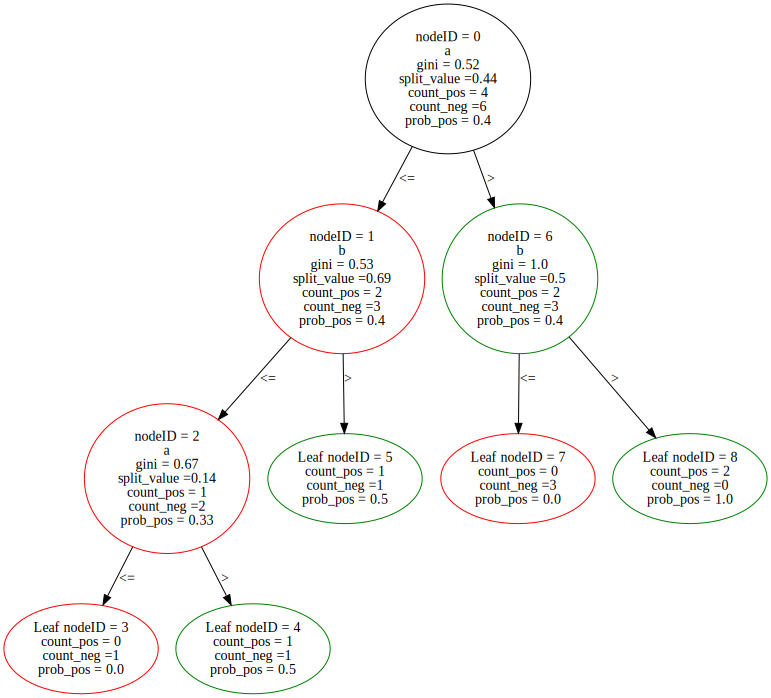

In [136]:
import graphviz
graph = graphviz.Source(tree_dot_graph)  
graph 

In [137]:
df_test=pd.DataFrame({'a':np.random.rand(3), 'b':np.random.rand(3)})
df_test

,a,b
0,0.927705,0.557919
1,0.758524,0.706876
2,0.675376,0.172314


In [79]:
df_y_test = pd.DataFrame({'target':np.round(np.random.rand(3))})
df_y_test

,target
0,1.0
1,0.0
2,1.0


In [78]:
preds = newTreeRoot.predict(df_test)
preds

a    0.872900
b    0.710807
Name: 0, dtype: float64
a    0.932203
b    0.422883
Name: 1, dtype: float64
a    0.520529
b    0.024728
Name: 2, dtype: float64


[(<__main__.tNode at 0x10e1f20b8>, <__main__.tNode at 0x10e1f2b70>),
 (<__main__.tNode at 0x10e1f2898>, <__main__.tNode at 0x10e1f2be0>),
 (<__main__.tNode at 0x10e165a58>, <__main__.tNode at 0x10e1653c8>)]

In [80]:
preds[0][0].feature_name

'a'

In [81]:
(preds[0][0].count_positive,preds[0][0].count_negative)

(5, 5)

In [82]:
(preds[0][0].ratio_positive,preds[0][0].ratio_negative)

(50.0, 50.0)

In [83]:
preds[0][0].sub_Node.feature_name

'a'

In [84]:
(preds[0][0].sub_Node.count_positive, preds[0][0].sub_Node.count_negative)

(4, 2)

In [85]:
(preds[0][0].sub_Node.ratio_positive, preds[0][0].sub_Node.ratio_negative)

(66.66666666666666, 33.33333333333333)

In [86]:
preds[0][0].sub_Node.sub_Node.feature_name

''

In [87]:
preds[0][0].sub_Node.sub_Node.is_leaf

1

In [88]:
(preds[0][0].sub_Node.sub_Node.count_positive, preds[0][0].sub_Node.sub_Node.count_negative)

(1, 1)

In [89]:
(preds[0][0].sub_Node.sub_Node.ratio_positive, preds[0][0].sub_Node.sub_Node.ratio_negative)

(50.0, 50.0)

In [64]:
preds[0][0].sub_Node.sub_Node.sub_Node.feature_name

''

In [90]:
preds[0][0].sub_Node.sub_Node.sub_Node.is_leaf

AttributeError: 'NoneType' object has no attribute 'is_leaf'

In [91]:
(preds[0][0].sub_Node.sub_Node.sub_Node.count_positive, preds[0][0].sub_Node.sub_Node.sub_Node.count_negative)

AttributeError: 'NoneType' object has no attribute 'count_positive'

In [92]:
(preds[0][0].sub_Node.sub_Node.sub_Node.ratio_positive, preds[0][0].sub_Node.sub_Node.sub_Node.ratio_negative)

AttributeError: 'NoneType' object has no attribute 'ratio_positive'

In [93]:
preds[0][1].is_leaf

1

In [94]:
(preds[0][1].count_positive, preds[0][1].count_negative)

(1, 1)

In [95]:
(preds[0][1].ratio_positive, preds[0][1].ratio_negative)

(50.0, 50.0)

##### Highlight a prediction path on the tree graph for a specific sample

##### Track down the most influenced feature for a specific prediction 

We can see that for each leaf there is only single path to get there so we can precompute the contribution of each feature to the prob (pos/neg) at each leaf. Then we can have intuitive of which feature/features affect a specific decision the most.

The formula to calculate the contribution of a feature is:


#### Medium Dataset

In [138]:
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer(return_X_y=False)

In [139]:
bc_X = dataset.data
bc_X

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [140]:
bc_Y = dataset.target
bc_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [141]:
bc_columns = dataset.feature_names
bc_columns

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [142]:
bc_target = dataset.target_names
bc_target

array(['malignant', 'benign'], 
      dtype='<U9')

In [143]:
df_bc_X = pd.DataFrame(bc_X, columns=bc_columns)
df_bc_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [144]:
df_bc_Y = pd.DataFrame(bc_Y, columns=[bc_target[0]])
df_bc_Y.head()

,malignant
0,0
1,0
2,0
3,0
4,0


In [145]:
df_bc_Y.describe()

,malignant
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [146]:
df_bc_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [147]:
df_bc_X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [148]:
newTree = tTree()
newTree.fit(df_bc_X, df_bc_Y)

Number of nodes in the tree: 209


In [149]:
tree_dot_graph=newTree.export_graphviz()

graph { node0[label= "nodeID = 0 
mean perimeter
 gini = 0.78
 split_value =91.97
 count_pos = 357
 count_neg =212
 prob_pos = 0.63"];node1[label = "nodeID = 1
compactness error
 gini = 0.85
 split_value =0.02
 count_pos = 313
 count_neg =30
 prob_pos = 0.91",color="red"];node0 -- node1[label ="<=", dir = "forward"];node114[label = "nodeID = 114
smoothness error
 gini = 0.7
 split_value =0.01
 count_pos = 44
 count_neg =182
 prob_pos = 0.19",color="green"];node0 -- node114[label =">", dir = "forward"];node2[label = "nodeID = 2
mean radius
 gini = 0.91
 split_value =11.91
 count_pos = 211
 count_neg =11
 prob_pos = 0.95",color="red"];node1 -- node2[label ="<=", dir = "forward"];node73[label = "nodeID = 73
symmetry error
 gini = 0.75
 split_value =0.02
 count_pos = 102
 count_neg =19
 prob_pos = 0.84",color="green"];node1 -- node73[label =">", dir = "forward"];node3[label = "nodeID = 3
mean radius
 gini = 0.96
 split_value =10.63
 count_pos = 101
 count_neg =2
 prob_pos = 0.98",color="re

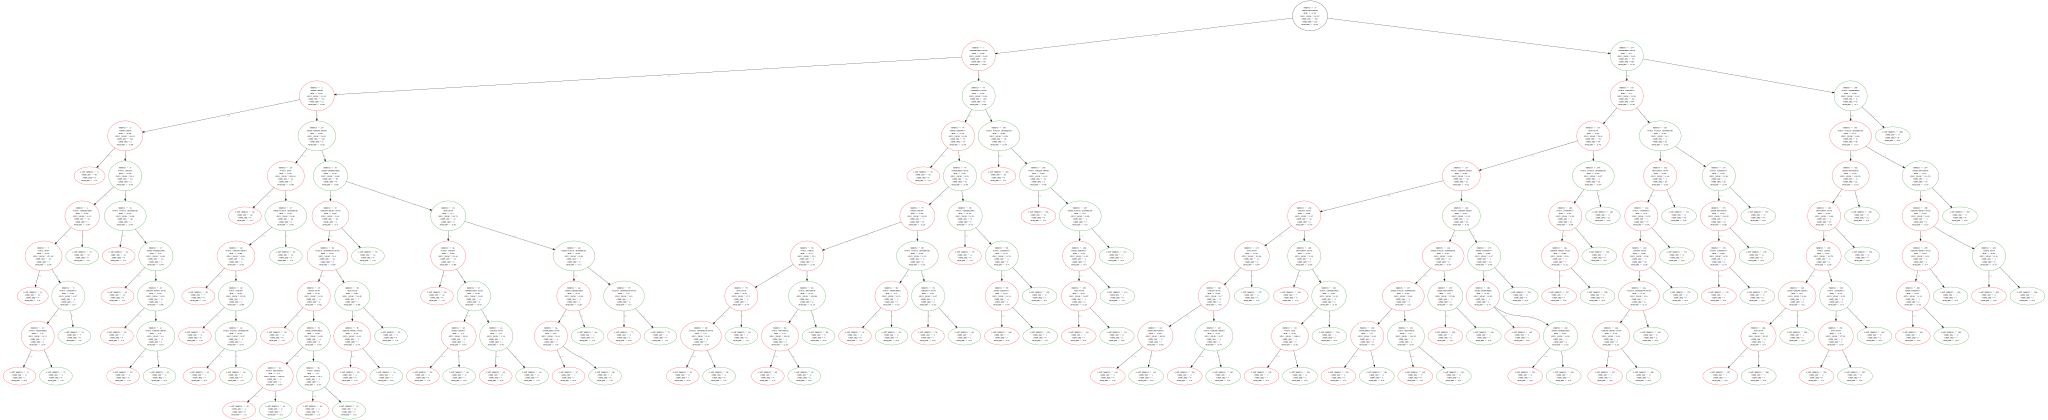

In [150]:
graph = graphviz.Source(tree_dot_graph)  
graph 